# Project: Investigating World Environmental Death Causes (Gapminder)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I've used covers the environmental causes behind the deaths of people around the world, and it can be found here: https://www.gapminder.org/data/

#### Questions to be explored:
* Which country had the highest number of environmental caused deaths?
* Which year had the highest number of environmental caused deaths?


* Which country had the highest number of deaths, for each of the five environmental causing deaths?
* Which year had the highest number of deaths, for each of the five environmental causing deaths?


* Between 1970 and 2008, which environmental cause was behind the highest number of deaths?
* In all countries, which environmental cause was behind the highest number of deaths?


* Between 1970 and 2008, in all countries, how many people died because of environmental causes?

<a id='gathering'></a>
## Data Gathering

#### Setting up the development environment

In [46]:
# import all needed libraries/packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to allow for plots to be displayed
%matplotlib inline

#### Loading data from CSV files

In [47]:
# Load environmental data
earthquake_deaths = pd.read_csv('./Data/Environmental/earthquake_deaths_annual_number.csv') # has 85 countries
extreme_temp_deaths = pd.read_csv('./Data/Environmental/extreme_temperature_deaths_annual_number.csv')
flood_deaths = pd.read_csv('./Data/Environmental/flood_deaths_annual_number.csv')
drought_deaths = pd.read_csv('./Data/Environmental/drought_deaths_annual_number.csv')
storm_deaths = pd.read_csv('./Data/Environmental/storm_deaths_annual_number.csv')

<a id='wrangling'></a>
## Data Wrangling
### Data Assesment
#### Inspecting the datatypes, size, and content
This was done for each loaded data.

* earthquake_deaths had data on 85 countries
* extreme_temp_deaths had data on 68 countries
* flood_deaths had data on 166 countries
* drought_deaths had data on had data on 123 countries
* storm_deaths had data on 149 countries

* They all covered the period between 1970 and 2008.

In [ ]:
display(earthquake_deaths.info())
display(earthquake_deaths.head(5))

display(extreme_temp_deaths.info())
display(extreme_temp_deaths.head(5))

display(flood_deaths.info())
display(flood_deaths.head(5))

display(drought_deaths.info())
display(drought_deaths.head(5))

display(storm_deaths.info())
display(storm_deaths.head(5))

In [49]:
display(earthquake_deaths.columns)

Index(['geo', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008'],
      dtype='object')

#### Checking for duplacate values
This was done for each loaded data.

In [50]:
sum(earthquake_deaths.duplicated())
'''sum(extreme_temp_deaths.duplicated())
sum(flood_deaths.duplicated())
sum(drought_deaths.duplicated())
sum(storm_deaths.duplicated())'''

'sum(extreme_temp_deaths.duplicated())\nsum(flood_deaths.duplicated())\nsum(drought_deaths.duplicated())\nsum(storm_deaths.duplicated())'

#### Extracting useful information for further exploration
List of countries, years, and environmaental causes.

In [51]:
# Define variables needed for processing the data

# extracting  a list of all countries
countries = extreme_temp_deaths['geo'].values.tolist()
flood_countries = flood_deaths['geo'].values.tolist()

# extracting a list of all years
years = np.delete(extreme_temp_deaths.columns.values, 0) # remove the column 'geo'

# all the environmental causes
causes = ['earthquakes', 'extreme temparature', 'floods', 'droughts', 'storms']

I've decided to focus on 30 countries only, as GapMinder did not provide stats for all countries in all environmental caused deaths.

In [52]:
print(len(countries))
countries

30


['Afghanistan',
 'Albania',
 'Algeria',
 'Argentina',
 'Australia',
 'Bangladesh',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Chile',
 'China',
 'Croatia',
 'El Salvador',
 'Greece',
 'Guatemala',
 'India',
 'Italy',
 'Japan',
 'Mexico',
 'Morocco',
 'Nepal',
 'New Zealand',
 'Pakistan',
 'Peru',
 'Romania',
 'Russia',
 'South Africa',
 'Spain',
 'Tajikistan',
 'United States']

The data covered the period between 1970 and 2008.

In [53]:
print(len(years))
years

39


array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008'], dtype=object)

The data focused on 5 environmental death causes as listed below.

In [54]:
causes

['earthquakes', 'extreme temparature', 'floods', 'droughts', 'storms']

### Data Cleaning

Finding the total number of deaths (sum) in each country and year:

In [55]:
# This function adds a column (country_total) that sums each row, and a row (year_total) that sums each column.
def sum_data(data):
    new_data = data
    new_data['country_total'] = new_data[years].sum(axis=1)
    new_data.loc['year_total']= new_data[years].sum()
    return new_data

In [56]:
earthquake_deaths = sum_data(earthquake_deaths)
extreme_temp_deaths = sum_data(extreme_temp_deaths)
flood_deaths = sum_data(flood_deaths)
drought_deaths = sum_data(drought_deaths)
storm_deaths = sum_data(storm_deaths)

In [57]:
display(earthquake_deaths)

,geo,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,country_total
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,...,0.0,4.0,1200.0,1.0,2.0,6.0,1.0,0.0,0.0,9200.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2280.0,0.0,0.0,4.0,0.0,0.0,5170.0
3,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0
4,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
5,Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,34.0
6,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7,Bolivia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0
8,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
9,Chile,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,0.0,12.0,0.0,308.0


<a id='eda'></a>
## Exploratory Data Analysis

### Computing statistics
#### Create summary dataframes to explore some stats

In [58]:
# This function creates a dataframe of countries and the total number of deaths in each one, and finds which country had the max deaths
def strip_years(data):
    newdata = data.drop(years, 1) # drop year columns
    newdata = newdata.drop('year_total', 0) # drop the year_total row
    
    max_country = newdata['country_total'].idxmax()
    
    sum_country = newdata['country_total'].sum()
    
    return newdata, max_country, sum_country

In [59]:
# This function creates a dataframe of years and the total number of deaths in each one, and finds which year had the max deaths
def strip_countries(data):
    newdata = data.drop(data.index[0:30], 0) # drop countries rows
    newdata = newdata.drop('country_total', 1) # drop country_total columns
    newdata = newdata.drop('geo', 1) # drop the year_total row
    newdata = newdata.T

    max_year = newdata['year_total'].idxmax()
    
    sum_year = newdata['year_total'].sum()
    
    return newdata, max_year, sum_year

Create the country data summary, and extract the max, sum values.

In [60]:
# create new dataframes that summarize the data read dataframes to prepare them for plotting
earthquake_country_summary, earthquake_max_country, earthquake_sum_country = strip_years(earthquake_deaths)
extreme_temp_country_summary, extreme_temp_max_country, extreme_temp_sum_country = strip_years(extreme_temp_deaths)
flood_country_summary, flood_max_country, flood_sum_country = strip_years(flood_deaths)
drought_country_summary, drought_max_country, drought_sum_country = strip_years(drought_deaths)
storm_country_summary, storm_max_country, storm_sum_country = strip_years(storm_deaths)

# create an array to hold all the max and sum values for all environmental cause deaths per country
country_max = [earthquake_max_country, extreme_temp_max_country, flood_max_country, drought_max_country, storm_max_country]
country_sum = [earthquake_sum_country, extreme_temp_sum_country, flood_sum_country, drought_sum_country, storm_sum_country]

# create an array to hold the death sum in each country for all environmental causes
country_data = pd.DataFrame({'geo' : countries, 'cause_c_t' : earthquake_country_summary.country_total+extreme_temp_country_summary.country_total+flood_country_summary.country_total+drought_country_summary.country_total+storm_country_summary.country_total})

In [61]:
country_max

[10, 16, 15, 10, 5]

### 1. Which country had the highest number of (earthquake/extreme-temparature/flood/drought/storm) deaths?

#### 1.1 Which country had the highest number of earthquake deaths?
**China** had the highest number of **earthquake** caused deaths.

In [62]:
earthquake_country_summary.iloc[[10]]

,geo,country_total
10,China,371969.0


#### 1.2 Which country had the highest number of extreme temparature deaths?
**Italy** had the highest number of **extreme temparature** caused deaths.

In [63]:
extreme_temp_country_summary.iloc[[16]]

,geo,country_total
16,Italy,20125.0


#### 1.3 Which country had the highest number of flood deaths?
**India** had the highest number of **flood** caused deaths.

In [64]:
flood_country_summary.iloc[[15]]

,geo,country_total
15,India,47312.0


#### 1.4 Which country had the highest number of flood deaths?
**China** had the highest number of **drought** caused deaths.

In [65]:
drought_country_summary.iloc[[10]]

,geo,country_total
10,China,3534.0


#### 1.5 Which country had the highest number of storm deaths?
**Bangladesh** had the highest number of **storm** caused deaths.

In [66]:
storm_country_summary.iloc[[5]]

,geo,country_total
5,Bangladesh,473779.0


The total number of deaths in all 30 countries, caused by each environmental cause are as follows;
* Earthquakes (620208)
* Extremem Temparatures (65107.0)
* Floods (165214.0)
* Droughts (4125.0)
* Storms (555502.0)

In [67]:
country_sum

[620208.0, 65107.0, 165214.0, 4125.0, 555502.0]

### 2. What's the environmental cause behind the highest number of deaths in all country?
The **#1** environmental cause behind the deaths of people in all these countries is **earthquakes**.

In [68]:
max(country_sum)

620208.0

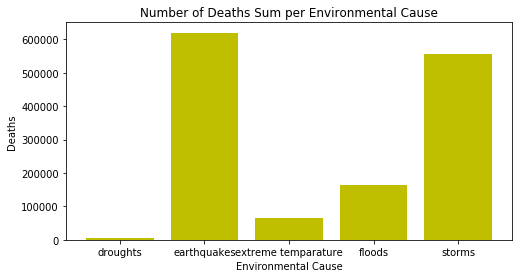

In [69]:
# Create plots to show the environmental cause behind the highest number of deaths
plt.figure(figsize=(8,4))
    
plt.bar(causes, country_sum, color='y')

plt.title('Number of Deaths Sum per Environmental Cause')
plt.xlabel('Environmental Cause')
plt.ylabel('Deaths')

plt.show()

In [70]:
display(earthquake_country_summary.head(3))
display(country_data.head(3))
print('max: {}'.format(earthquake_country_summary.loc[[earthquake_max_country]]))
print('sum: {}'.format(earthquake_sum_country))

,geo,country_total
0,Afghanistan,9200.0
1,Albania,36.0
2,Algeria,5170.0


,cause_c_t,geo
0,14884.0,Afghanistan
1,134.0,Albania
2,6804.0,Algeria


max:       geo  country_total
10  China       371969.0
sum: 620208.0


Create the year data summary, and extract the max, sum values.

In [71]:
# create new dataframes that summarize the data read dataframes to prepare them for plotting
earthquake_year_summary, earthquake_max_year, earthquake_sum_year = strip_countries(earthquake_deaths)
extreme_temp_year_summary, extreme_temp_max_year, extreme_temp_sum_year = strip_countries(extreme_temp_deaths)
flood_year_summary, flood_max_year, flood_sum_year = strip_countries(flood_deaths)
drought_year_summary, drought_max_year, drought_sum_year = strip_countries(drought_deaths)
storm_year_summary, storm_max_year, storm_sum_year = strip_countries(storm_deaths)

# create an array to hold all the max and sum values for all environmental cause deaths per year
year_sum = [earthquake_sum_year, extreme_temp_sum_year, flood_sum_year, drought_sum_year, storm_sum_year]
year_max = [earthquake_max_year, extreme_temp_max_year, flood_max_year, drought_max_year, storm_max_year]

# create an array to hold the death sum in each year for all environmental causes
year_data = pd.DataFrame({'year' : years, 'cause_y_t' : earthquake_year_summary.year_total+extreme_temp_year_summary.year_total+flood_year_summary.year_total+drought_year_summary.year_total+storm_year_summary.year_total})

In [72]:
year_max

['1976', '2003', '1974', '1991', '1970']

### 3. Which year had the highest number of (earthquake/extreme-temparature/flood/drought/storm) deaths?

#### 3.1 Which year had the highest number of earthquake deaths?
The highest number of **earthquake** caused deaths was in **1976**.

In [73]:
earthquake_year_summary.iloc[[years.tolist().index('1976')]]

,year_total
1976,265984.0


#### 3.2 Which year had the highest number of ectreme temparature deaths?
The highest number of **extreme temparature** caused deaths was in **2003**.

In [74]:
extreme_temp_year_summary.iloc[[years.tolist().index('2003')]]

,year_total
2003,39641.0


#### 3.3 Which year had the highest number of flood deaths?
The highest number of **flood** caused deaths was in **1974**.

In [75]:
flood_year_summary.iloc[[years.tolist().index('1974')]]

,year_total
1974,29279.0


#### 3.4 Which year had the highest number of drought deaths?
The highest number of **drought** caused deaths was in **1991**.

In [76]:
drought_year_summary.iloc[[years.tolist().index('1991')]]

,year_total
1991,2000.0


#### 3.5 Which year had the highest number of storm deaths?
The highest number of **storm** caused deaths was in **1970**.

In [77]:
storm_year_summary.iloc[[years.tolist().index('1970')]]

,year_total
1970,300192.0


The total number of deaths between 1970 and 2008, caused by each environmental cause are as follows;
* Earthquakes (620208)
* Extremem Temparatures (65107.0)
* Floods (165214.0)
* Droughts (4125.0)
* Storms (555502.0)

In [78]:
year_sum

[620208.0, 65107.0, 165214.0, 4125.0, 555502.0]

### 4. What's the environmental cause behind the highest number of deaths in all years?
The **#1** environmental cause behind the deaths of people between 1970 and 2008 is **earthquakes**.

In [79]:
max(year_sum)

620208.0

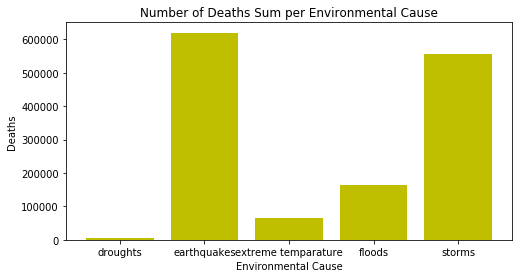

In [80]:
# Create plots to show the environmental cause behind the highest number of deaths
plt.figure(figsize=(8,4))
    
plt.bar(causes, year_sum, color='y')

plt.title('Number of Deaths Sum per Environmental Cause')
plt.xlabel('Environmental Cause')
plt.ylabel('Deaths')

plt.show()

In [81]:
display(earthquake_year_summary.head(3))
display(year_data.head(3))
print('max: {}'.format(earthquake_year_summary.loc[earthquake_max_year]))
print('sum: {}'.format(earthquake_sum_year))

,year_total
1970,76826.0
1971,172.0
1972,113.0


,cause_y_t,year
1970,378907.0,1970
1971,12604.0,1971
1972,1891.0,1972


max: year_total    265984.0
Name: 1976, dtype: float64
sum: 620208.0


### 5. Between 1970 and 2008, in all 30 countries, how many people died because of environmental causes?
A total of 1,410,156 people died because of environmental causes.

In [82]:
sum(year_sum)

1410156.0

### Visualisations

In [83]:
# This function takes a dataframe and a title to create a per-country plot
def plot_countries(data, title):
    plt.figure(figsize=(8,4))

    plt.bar(data['geo'], data['country_total'])

    locations = np.arange(0,29,1)
    plt.xticks(locations, countries, rotation=90)
    
    plt.title(title)
    plt.xlabel('Countries')
    plt.ylabel('Deaths')

    plt.show()

In [84]:
# This function takes a dataframe and a title to create a per-year plot
def plot_years(data, title):
    plt.figure(figsize=(8,4))
    
    plt.bar(data.index, data['year_total'], color='g')

    locations = np.arange(0,39,1)
    plt.xticks(locations, years, rotation=90)
    
    plt.title(title)
    plt.xlabel('Years')
    plt.ylabel('Deaths')

    plt.show()

### 6. Which year had the the highest number of environmental caused deaths?

Between 1970 and 2008, **1970** has the highest number of environmental caused deaths.

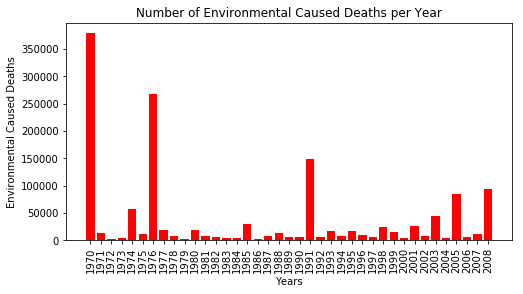

In [85]:
# Create plots to show the year with the highest number of environmental caused deaths
plt.figure(figsize=(8,4))
    
plt.bar(years, year_data.cause_y_t, color='r')

locations = np.arange(0,39,1)
plt.xticks(locations, years, rotation=90)

plt.title('Number of Environmental Caused Deaths per Year')
plt.xlabel('Years')
plt.ylabel('Environmental Caused Deaths')

plt.show()

### 7. Which country had the the highest number of environmental caused deaths?

In all 30 countries, the highest number of environmental caused deaths was in **Bangladesh**.

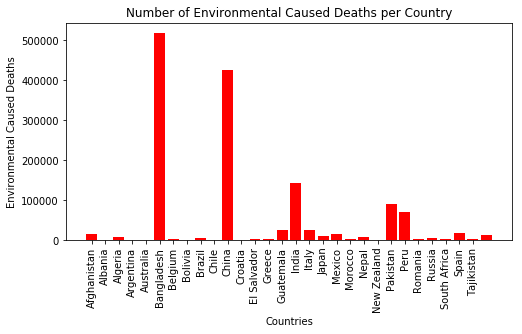

In [86]:
# Create plots to show the country with the highest number of environmental caused deaths
plt.figure(figsize=(8,4))
    
plt.bar(countries, country_data.cause_c_t, color='r')

locations = np.arange(0,29,1)
plt.xticks(locations, countries, rotation=90)

plt.title('Number of Environmental Caused Deaths per Country')
plt.xlabel('Countries')
plt.ylabel('Environmental Caused Deaths')

plt.show()

### Visualisations for Q1
#### For each of the five environmental causing deaths, which country had the highest number of deaths?

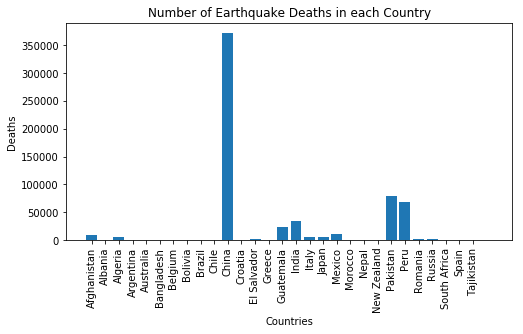

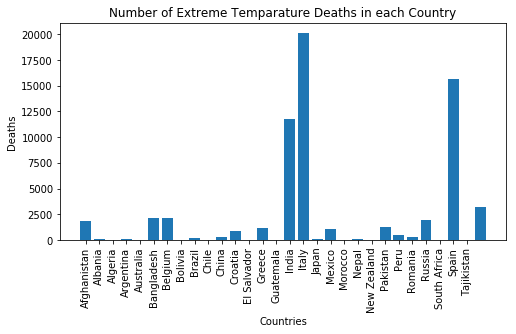

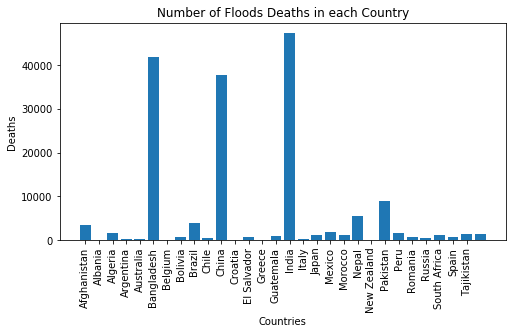

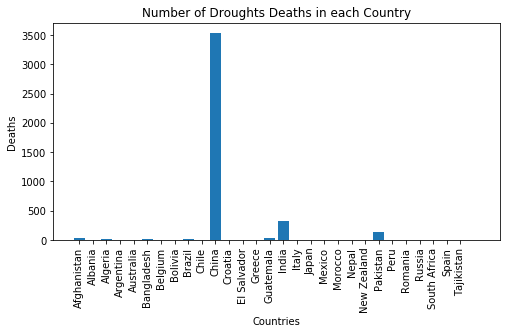

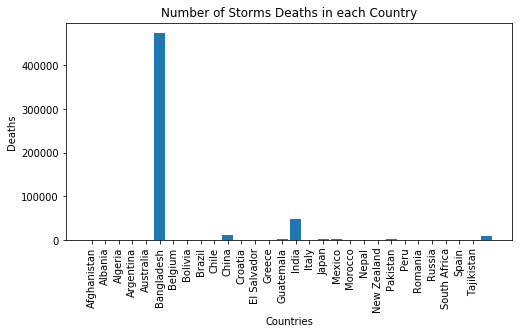

In [87]:
# Create plots to show the highest number of deaths for each environmental cause per country
plot_countries(earthquake_country_summary, 'Number of Earthquake Deaths in each Country')
plot_countries(extreme_temp_country_summary, 'Number of Extreme Temparature Deaths in each Country')
plot_countries(flood_country_summary, 'Number of Floods Deaths in each Country')
plot_countries(drought_country_summary, 'Number of Droughts Deaths in each Country')
plot_countries(storm_country_summary, 'Number of Storms Deaths in each Country')

### Visualisations for Q3
#### For each of the five environmental causing deaths, which year had the highest number of deaths?

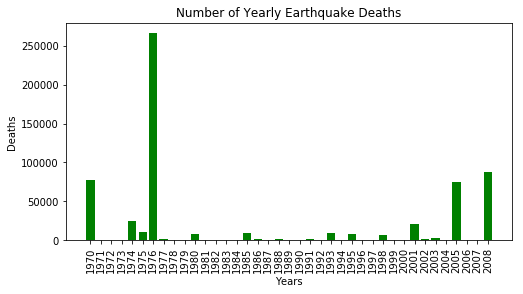

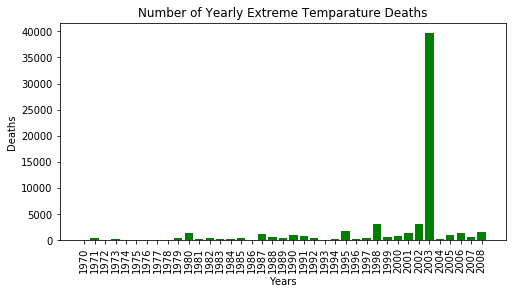

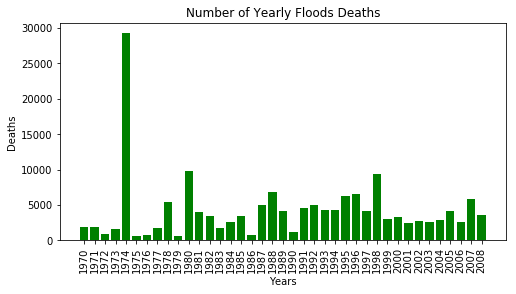

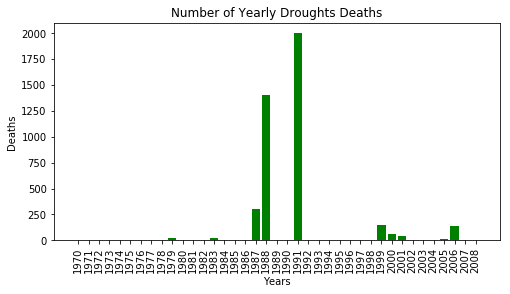

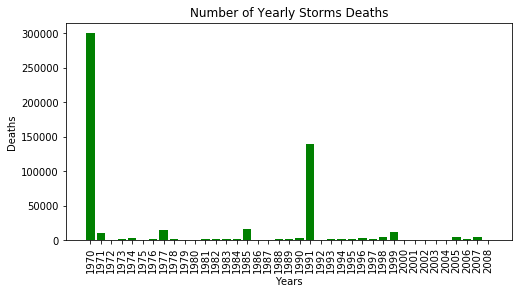

In [88]:
# Create plots to show the highest number of deaths for each environmental cause per year
plot_years(earthquake_year_summary, 'Number of Yearly Earthquake Deaths')
plot_years(extreme_temp_year_summary, 'Number of Yearly Extreme Temparature Deaths')
plot_years(flood_year_summary, 'Number of Yearly Floods Deaths')
plot_years(drought_year_summary, 'Number of Yearly Droughts Deaths')
plot_years(storm_year_summary, 'Number of Yearly Storms Deaths')